In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
np.random.seed(0)
plt.style.use("ggplot")

import tensorflow as tf
print('Tensorflow version:', tf.__version__)
print('GPU detected:', tf.config.list_physical_devices('GPU'))

Tensorflow version: 2.2.0
GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Named_Entity_Recognition')

In [0]:
data = pd.read_csv('ner_dataset.csv', encoding = 'latin1')

In [0]:
data = data.fillna(method = 'ffill')

*Essential info about tagged entities*:
- geo = Geographical Entity
- org = Organization
- per = Person
- gpe = Geopolitical Entity
- tim = Time indicator
- art = Artifact
- eve = Event
- nat = Natural Phenomenon

In [7]:
data.head(20)

,Sentence #,Word,POS,Tag
0,Sentence: 1,Thousands,NNS,O
1,Sentence: 1,of,IN,O
2,Sentence: 1,demonstrators,NNS,O
3,Sentence: 1,have,VBP,O
4,Sentence: 1,marched,VBN,O
5,Sentence: 1,through,IN,O
6,Sentence: 1,London,NNP,B-geo
7,Sentence: 1,to,TO,O
8,Sentence: 1,protest,VB,O
9,Sentence: 1,the,DT,O


In [8]:
print("Unique words in corpus: ", data["Word"].nunique())
print("Unique tags in corpus: ", data["Tag"].nunique())

Unique words in corpus:  35178
Unique tags in corpus:  17


In [9]:
words = list(set(data["Word"].values))
words.append("ENDPAD")
num_words = len(words)
num_words

35179

In [10]:
tags = list(set(data["Tag"].values))
num_tags = len(tags)
num_tags

17

In [0]:
class SentenceGetter(object):
  def __init__(self, data):
    self.data = data
    agg_function = lambda s : [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                            s["POS"].values.tolist(),
                                                            s["Tag"].values.tolist())]

    self.grouped = self.data.groupby("Sentence #").apply(agg_function)
    self.sentences = [s for s in self.grouped]                                                        

In [0]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [14]:
sentences[0]

[('Thousands', 'NNS', 'O'),
 ('of', 'IN', 'O'),
 ('demonstrators', 'NNS', 'O'),
 ('have', 'VBP', 'O'),
 ('marched', 'VBN', 'O'),
 ('through', 'IN', 'O'),
 ('London', 'NNP', 'B-geo'),
 ('to', 'TO', 'O'),
 ('protest', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('war', 'NN', 'O'),
 ('in', 'IN', 'O'),
 ('Iraq', 'NNP', 'B-geo'),
 ('and', 'CC', 'O'),
 ('demand', 'VB', 'O'),
 ('the', 'DT', 'O'),
 ('withdrawal', 'NN', 'O'),
 ('of', 'IN', 'O'),
 ('British', 'JJ', 'B-gpe'),
 ('troops', 'NNS', 'O'),
 ('from', 'IN', 'O'),
 ('that', 'DT', 'O'),
 ('country', 'NN', 'O'),
 ('.', '.', 'O')]

In [0]:
word2idx = {w : i + 1 for i, w in enumerate(words)}
tag2idx = {t : i for i, t in enumerate(tags)}

In [16]:
word2idx

{'ensured': 1,
 'Modena': 2,
 'Livestock': 3,
 'warned': 4,
 'sharia': 5,
 'exacerbates': 6,
 'earns': 7,
 '39th': 8,
 'Thamilselvan': 9,
 'Faxas': 10,
 'notably': 11,
 'power': 12,
 '9,00,000': 13,
 'Indolent': 14,
 'arms': 15,
 'progress': 16,
 'airborne': 17,
 'faint': 18,
 'Hafez': 19,
 'mutual': 20,
 'censor': 21,
 'fog': 22,
 'torching': 23,
 'air-dropping': 24,
 '1755': 25,
 'Ezzedine': 26,
 'second-round': 27,
 '47': 28,
 'Mikati': 29,
 'Anti-Doping': 30,
 'storied': 31,
 '68.4': 32,
 'weakness': 33,
 '12,500': 34,
 'polyglot': 35,
 'Taksim': 36,
 'tournaments': 37,
 'Briton': 38,
 'glades': 39,
 'Opening': 40,
 'broader': 41,
 'originally': 42,
 'compilation': 43,
 "B'Tselem": 44,
 'Grenoble': 45,
 'Accordance': 46,
 'Khun': 47,
 'skeptics': 48,
 'Suli': 49,
 'Chrysostom': 50,
 'abstraction': 51,
 'decapitated': 52,
 'Apple': 53,
 'kitchen': 54,
 'retroactive': 55,
 '51,000': 56,
 'Mayon': 57,
 'its': 58,
 'teachers': 59,
 'atrocious': 60,
 'Anti-Bush': 61,
 'Geneina': 62,
 'S

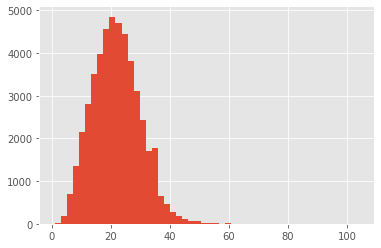

In [17]:
#Plot dist of length of sentences to choose padding length

plt.hist([len(s) for s in sentences], bins = 50)
plt.show()

In [0]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 50

X = [[word2idx[w[0]] for w in s] for s in sentences]
X = pad_sequences(maxlen = max_len, sequences = X, padding = 'post', value = num_words - 1)

y = [[tag2idx[w[2]] for w in s] for s in sentences]
y = pad_sequences(maxlen = max_len, sequences = y, padding = 'post', value = tag2idx["O"])


In [0]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [0]:
from tensorflow.keras import Model, Input
from tensorflow.keras.layers import LSTM, Embedding, Dense
from tensorflow.keras.layers import TimeDistributed, SpatialDropout1D, Bidirectional

In [21]:
input_word = Input(shape = (max_len, ))
model = Embedding(input_dim = num_words, output_dim=50, input_length = max_len)(input_word)
model = SpatialDropout1D(0.1)(model)
model = Bidirectional(LSTM(units = 100, return_sequences=True, recurrent_dropout=0.1))(model)
out = TimeDistributed(Dense(num_tags, activation = 'softmax'))(model)
model = Model(input_word, out)

model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 50)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 50, 50)            1758950   
_________________________________________________________________
spatial_dropout1d (SpatialDr (None, 50, 50)            0         
_________________________________________________________________
bidirectional (Bidirectional (None, 50, 200)           120800    
_________________________________________________________________
time_distributed (TimeDistri (None, 50, 17)            3417      
Total params: 1,883,167
Trainable params: 1,883,167
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam",
              loss="sparse_categorical_crossentropy",
              metrics=["accuracy"])

In [24]:
pip install livelossplot==0.1.2

  Created wheel for livelossplot: filename=livelossplot-0.1.2-cp36-none-any.whl size=3831 sha256=4623d7b92a97db837f5cb4a63c524f208640db317aab167d9f4f65afcb420012
  Stored in directory: /root/.cache/pip/wheels/f4/55/86/50898b9cd6ffb3f93bf74412dbab199c689f581ad72061f5ef
Successfully built livelossplot


In [0]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
#from livelossplot.tf_keras import PlotLossesCallback

In [29]:
%%time

checkpoint = ModelCheckpoint("model_weights.h5", monitor = 'val_loss', mode = 'min', verbose = 1, save_best_only = True, save_weights_only = True)

early_stopping = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=1, verbose=0, mode='max', baseline=None, restore_best_weights=False)

callbacks = [checkpoint, early_stopping]

history = model.fit(x_train, y_train,
                    validation_data = (x_test, y_test), batch_size = 32, epochs = 3, callbacks = callbacks,
                    verbose = 1)

Epoch 1/3
1199/1199 [==============================] - ETA: 0s - loss: 0.1482 - accuracy: 0.9605
Epoch 00001: val_loss improved from inf to 0.06455, saving model to model_weights.h5
1199/1199 [==============================] - 353s 295ms/step - loss: 0.1482 - accuracy: 0.9605 - val_loss: 0.0645 - val_accuracy: 0.9815
Epoch 2/3
1199/1199 [==============================] - ETA: 0s - loss: 0.0487 - accuracy: 0.9855
Epoch 00002: val_loss improved from 0.06455 to 0.05014, saving model to model_weights.h5
1199/1199 [==============================] - 353s 294ms/step - loss: 0.0487 - accuracy: 0.9855 - val_loss: 0.0501 - val_accuracy: 0.9851
Epoch 3/3
1199/1199 [==============================] - ETA: 0s - loss: 0.0357 - accuracy: 0.9890
Epoch 00003: val_loss improved from 0.05014 to 0.04832, saving model to model_weights.h5
1199/1199 [==============================] - 351s 293ms/step - loss: 0.0357 - accuracy: 0.9890 - val_loss: 0.0483 - val_accuracy: 0.9857
CPU times: user 26min 10s, sys: 3mi

In [32]:
model.evaluate(x_test, y_test)

300/300 [==============================] - 7s 23ms/step - loss: 0.0483 - accuracy: 0.9857


[0.048319101333618164, 0.9856526255607605]

In [34]:
i = np.random.randint(0, x_test.shape[0]) 
p = model.predict(np.array([x_test[i]]))
p = np.argmax(p, axis=-1)
y_true = y_test[i]
print("{:15}{:5}\t {}\n".format("Word", "True", "Pred"))
print("-" *30)
for w, true, pred in zip(x_test[i], y_true, p[0]):
    print("{:15}{}\t{}".format(words[w-1], tags[true], tags[pred])) #For any ith example, show the sentence and its preds

Word           True 	 Pred

------------------------------
Nepalese       B-gpe	B-gpe
police         O	O
detained       O	O
41             O	O
Tibetans       B-gpe	B-gpe
Sunday         B-tim	I-tim
for            O	O
illegal        O	O
entry          O	O
into           O	O
the            O	O
country        O	O
.              O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawing        O	O
Drawi

In [30]:
print('GPU detected:', tf.config.list_physical_devices('GPU'))

GPU detected: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]
